In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [83]:
df = pd.read_csv('autotel_with_target_groupedby.csv',index_col=0)
df.drop(['Hour','Day','Month','Date','Year','Area','Population'],axis=1, inplace=True)

In [84]:
df_groupby = df.groupby('neighborhood')
groups_neighborhood = [df_groupby.get_group(x) for x in a.groups]

In [85]:
groups_neighborhood.sort(key=len,reverse=True)
groups_neighborhood   = [lst for lst in groups_neighborhood if len(lst) > 1000]
for group in groups_neighborhood:
    group.drop(['neighborhood'],axis=1, inplace=True);

In [68]:
X_list = [group[group.columns[:-1]].values for group in groups_neighborhood]
y_list = [group[group.columns[-1]].values for group in groups_neighborhood]


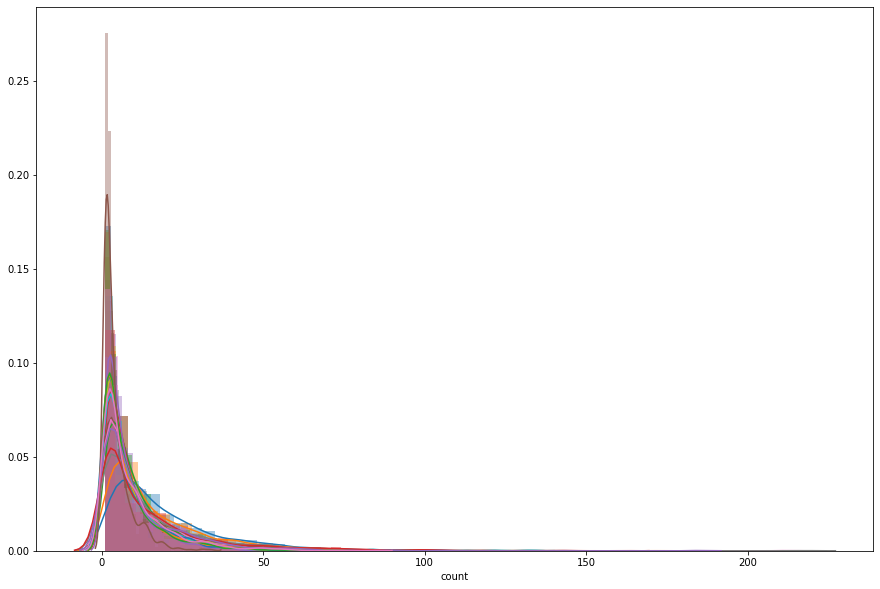

In [69]:
plt.figure(figsize=(15,10))
plt.tight_layout()
for group in groups_neighborhood:
    seabornInstance.distplot(group['count'])

In [70]:
train_test_split = [train_test_split(X, y, test_size=0.2, random_state=0) for X,y in zip(X_list, y_list)];

In [71]:
regressor = LinearRegression()  
LinearRegression = [regressor.fit(train_test[0], train_test[2]) for train_test in train_test_split];

In [72]:
LinearRegression[0].coef_

array([ 0.42040132,  0.3206566 , -0.02516954,  4.34858828, -0.06520041,
       -0.00717593,  5.10108457,  1.36464343,  0.97764591,  1.22985564,
        0.91537749,  0.01594138,  0.91537749,  0.01594138])

In [73]:
coeff_df = [pd.DataFrame(model.coef_, groups_neighborhood[0].columns[:-1], columns=['Coefficient']) for model in LinearRegression]
y_pred = [regressor.predict(train_test[1]) for train_test in train_test_split]

In [74]:
dfs = [pd.DataFrame({'Actual': train_test[3], 'Predicted': y_pred}) for train_test,y_pred in zip(train_test_split,y_pred)]


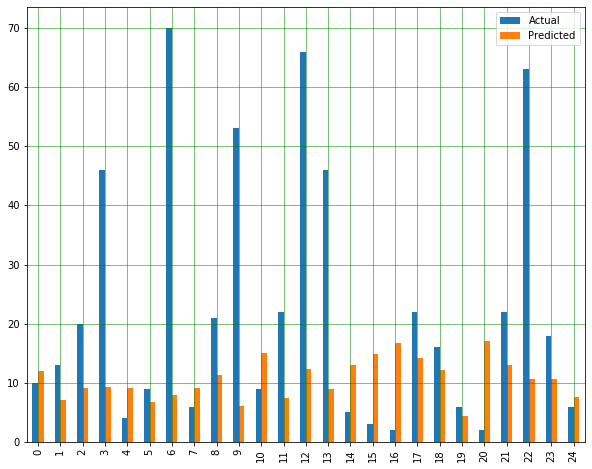

Mean Absolute Error: 14.387456154632622
Mean Squared Error: 537.4748370733688
Root Mean Squared Error: 23.18350355475567


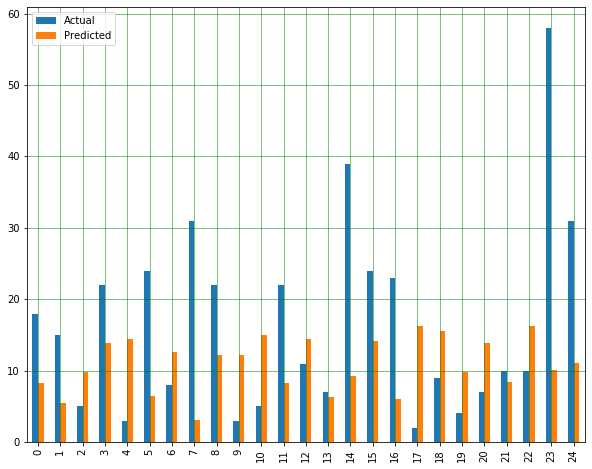

Mean Absolute Error: 11.432084275794884
Mean Squared Error: 288.92091717388206
Root Mean Squared Error: 16.99767387538313


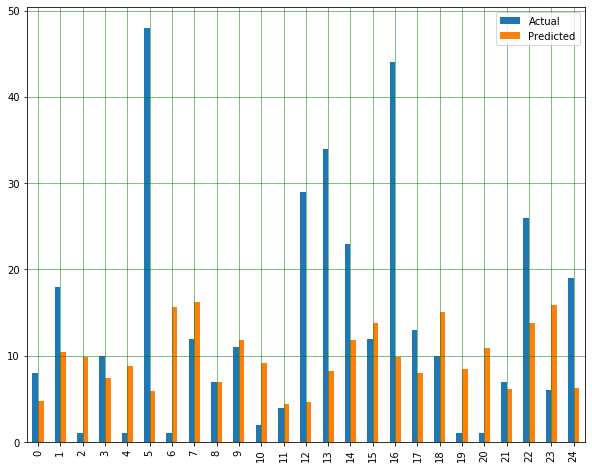

Mean Absolute Error: 9.740367693659133
Mean Squared Error: 208.89997872111573
Root Mean Squared Error: 14.453372572556058


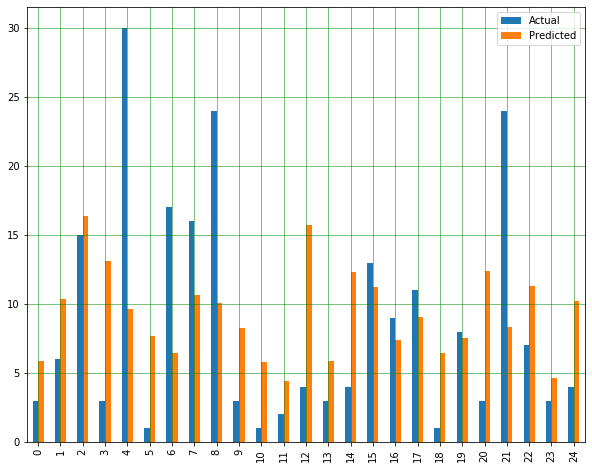

Mean Absolute Error: 7.4923453763621755
Mean Squared Error: 119.49863859383102
Root Mean Squared Error: 10.931543285091589


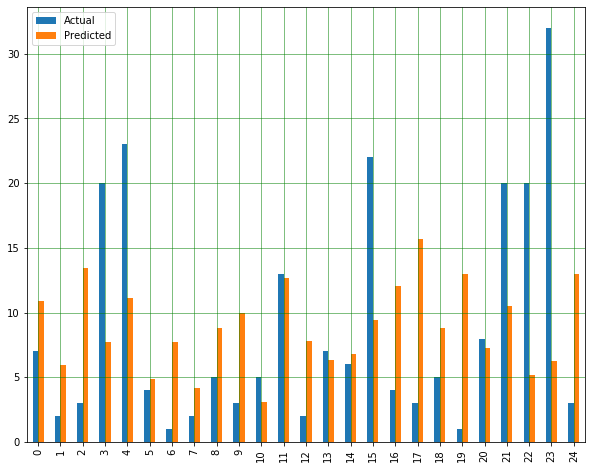

Mean Absolute Error: 7.072682446433357
Mean Squared Error: 113.17192608699985
Root Mean Squared Error: 10.638229462039247


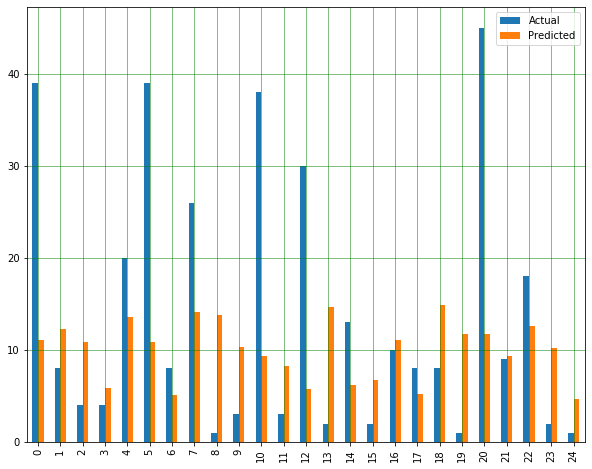

Mean Absolute Error: 8.960880039563838
Mean Squared Error: 172.10068446673944
Root Mean Squared Error: 13.118715046327496


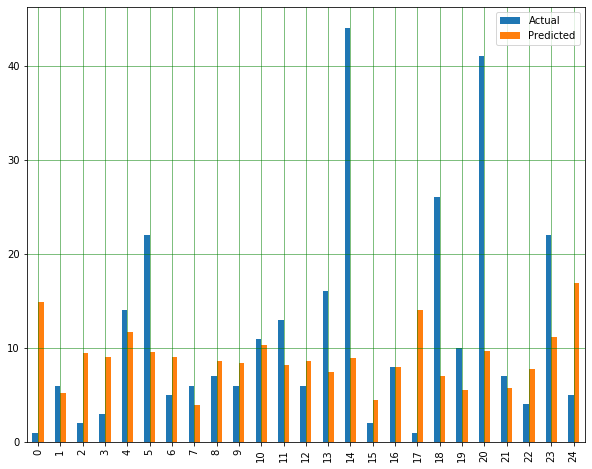

Mean Absolute Error: 9.87635856699097
Mean Squared Error: 227.04080732325752
Root Mean Squared Error: 15.067873351049164


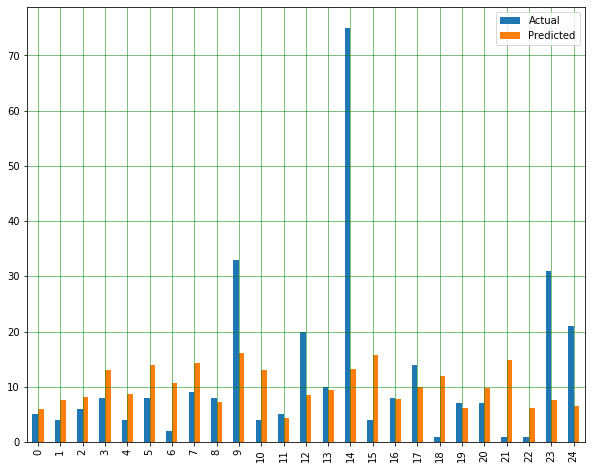

Mean Absolute Error: 13.377794155032774
Mean Squared Error: 587.6256301465481
Root Mean Squared Error: 24.240990700599433


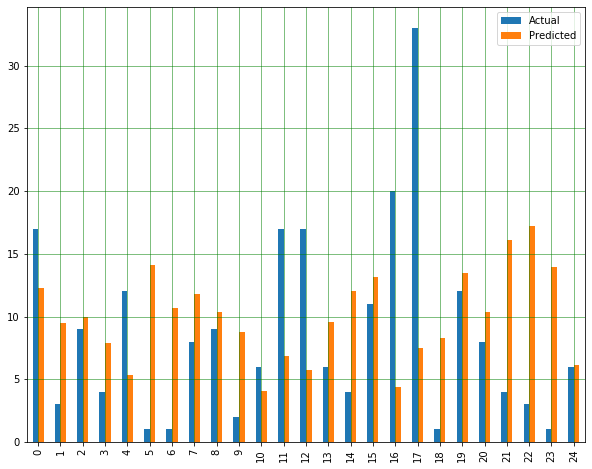

Mean Absolute Error: 7.660907298643903
Mean Squared Error: 114.91528291568216
Root Mean Squared Error: 10.719854612618688


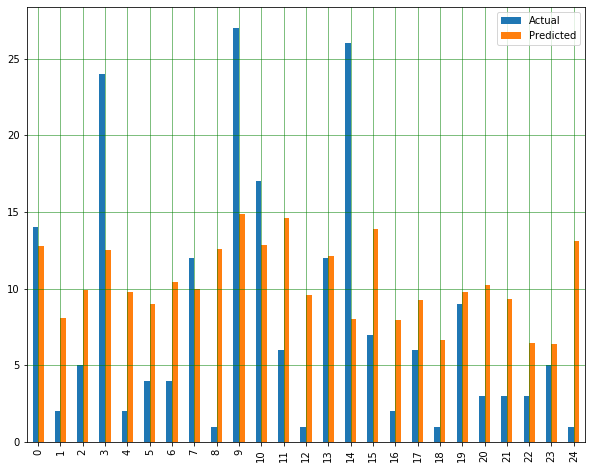

Mean Absolute Error: 8.087089621118041
Mean Squared Error: 171.8784782595708
Root Mean Squared Error: 13.110243257070817


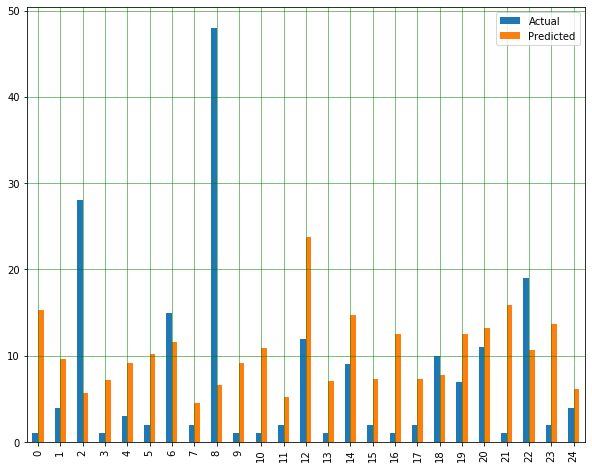

Mean Absolute Error: 8.094692472926777
Mean Squared Error: 126.76674006858707
Root Mean Squared Error: 11.25907367719863


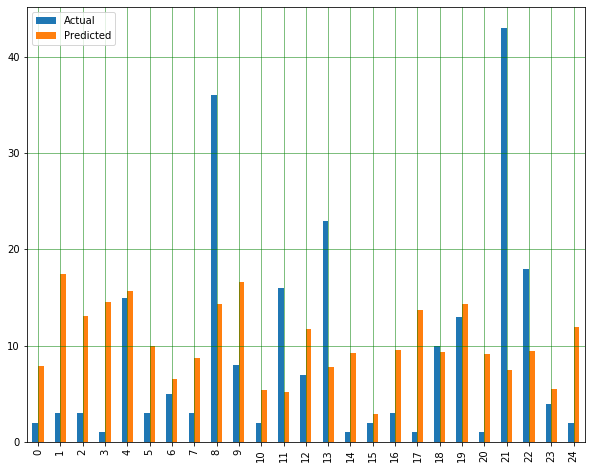

Mean Absolute Error: 6.396690219512749
Mean Squared Error: 88.37204101786806
Root Mean Squared Error: 9.400640457855415


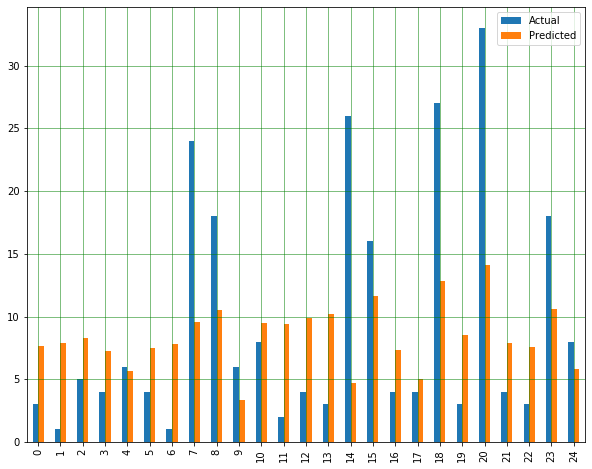

Mean Absolute Error: 7.371164132880169
Mean Squared Error: 111.61112215431802
Root Mean Squared Error: 10.564616517144295


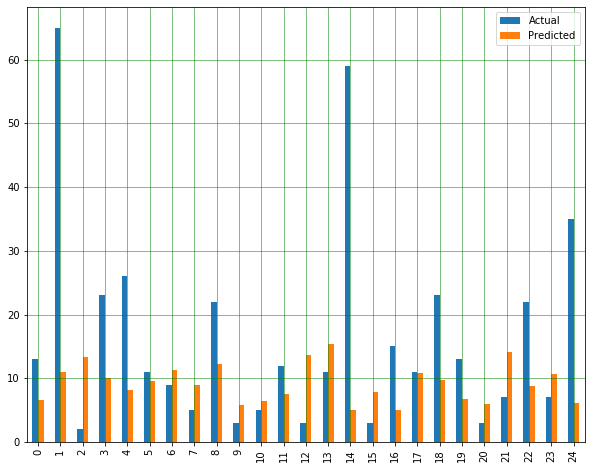

Mean Absolute Error: 12.79436691384158
Mean Squared Error: 401.3114529707725
Root Mean Squared Error: 20.032759494657057


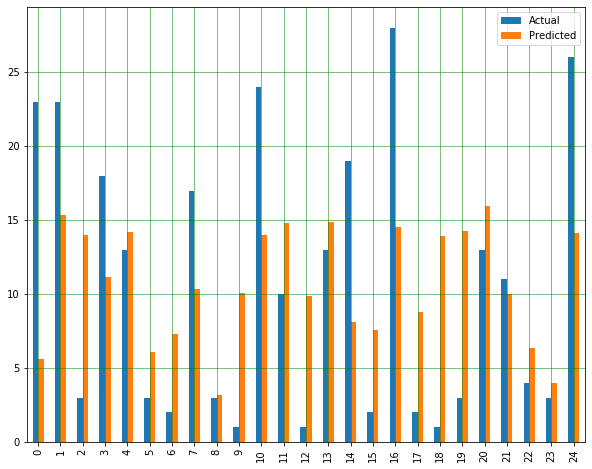

Mean Absolute Error: 8.06557938650175
Mean Squared Error: 151.88626614146222
Root Mean Squared Error: 12.32421462574643


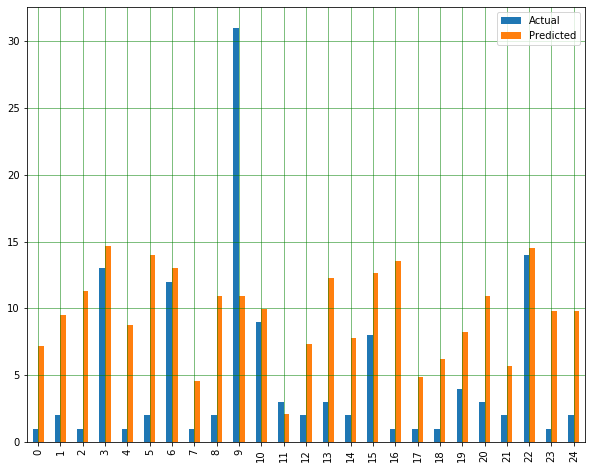

Mean Absolute Error: 6.321813910164339
Mean Squared Error: 56.2381351214038
Root Mean Squared Error: 7.4992089663779735


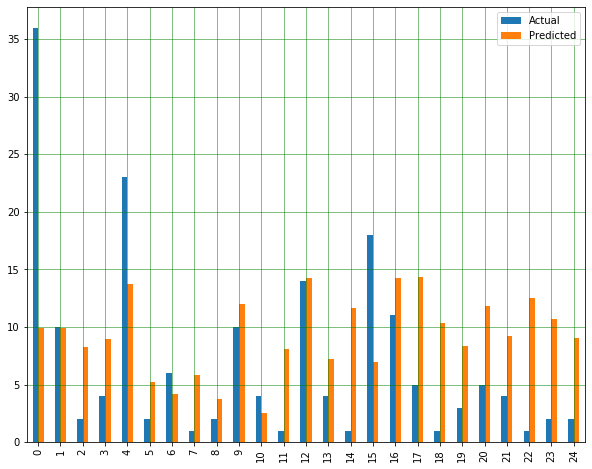

Mean Absolute Error: 7.485224117739502
Mean Squared Error: 136.63363255506368
Root Mean Squared Error: 11.689038991938716


In [75]:
for df1,train_test,y_pred in zip(dfs,train_test_split,y_pred):
    df1 = df1.head(25)
    df1.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    y_test = train_test[3]
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
